In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import deque
import time


def create_networkx_graph(adj_matrix):
    G = nx.Graph()
    
    # Add nodes
    for i in range(len(adj_matrix)):
        G.add_node(i)
    
    # Add edges
    for i in range(len(adj_matrix)):
        for j in range(i + 1, len(adj_matrix)):
            if adj_matrix[i][j] == 1:
                G.add_edge(i, j)
    
    return G

def visualize_graph(G, title, pos=None, path=None, current_node=None, visited_nodes=None):
    plt.figure(figsize=(10, 8))
    if pos is None:
        pos = nx.spring_layout(G)
    
    # Draw the basic graph
    nx.draw_networkx_edges(G, pos, edge_color='gray')
    
    # Draw nodes
    node_colors = ['lightblue'] * len(G.nodes())
    
    if visited_nodes:
        for node in visited_nodes:
            node_colors[node] = 'lightgreen'
    
    if current_node is not None:
        node_colors[current_node] = 'yellow'
    
    if path:
        # Highlight path nodes
        for node in path:
            node_colors[node] = 'red'
    
    nx.draw_networkx_nodes(G, pos, node_color=node_colors)
    nx.draw_networkx_labels(G, pos)
    
    plt.title(title)
    plt.show()
    plt.pause(0.5)  # Add delay to see the process

def bfs(G, adj_matrix, start, end, pos):
    num_nodes = len(adj_matrix)
    visited = [False] * num_nodes
    parent = [-1] * num_nodes
    visited_nodes = set()
    
    queue = deque([start])
    visited[start] = True
    visited_nodes.add(start)
    
    while queue:
        current = queue.popleft()
        
        # Visualize current state
        visualize_graph(G, f'BFS Process (Current: {current})', pos, 
                       current_node=current, visited_nodes=visited_nodes)
        
        if current == end:
            break
            
        for neighbor in range(num_nodes):
            if adj_matrix[current][neighbor] == 1 and not visited[neighbor]:
                queue.append(neighbor)
                visited[neighbor] = True
                visited_nodes.add(neighbor)
                parent[neighbor] = current
    
    # Reconstruct path
    path = []
    if parent[end] != -1 or start == end:
        current = end
        while current != -1:
            path.append(current)
            current = parent[current]
        path.reverse()
        
    return path

def dfs(G, adj_matrix, start, end, pos):
    num_nodes = len(adj_matrix)
    visited = [False] * num_nodes
    parent = [-1] * num_nodes
    visited_nodes = set()
    
    def dfs_recursive(current):
        if current == end:
            return True
            
        visited[current] = True
        visited_nodes.add(current)
        
        # Visualize current state
        visualize_graph(G, f'DFS Process (Current: {current})', pos, 
                       current_node=current, visited_nodes=visited_nodes)
        
        for neighbor in range(num_nodes):
            if adj_matrix[current][neighbor] == 1 and not visited[neighbor]:
                parent[neighbor] = current
                if dfs_recursive(neighbor):
                    return True
        
        return False
    
    dfs_recursive(start)
    
    # Reconstruct path
    path = []
    if parent[end] != -1 or start == end:
        current = end
        while current != -1:
            path.append(current)
            current = parent[current]
        path.reverse()
        
    return path




def generate_connected_graph(num_nodes):
    # Initialize adjacency matrix with zeros
    adj_matrix = [[0 for _ in range(num_nodes)] for _ in range(num_nodes)]
    
    # First, ensure all nodes are connected (create a path 0-1-2-...-n)
    for i in range(num_nodes - 1):
        adj_matrix[i][i + 1] = 1
        adj_matrix[i + 1][i] = 1
    
    # Add random additional edges
    for i in range(num_nodes):
        for j in range(i + 2, num_nodes):  # Start from i+2 to avoid duplicating existing edges
            if random.random() < 0.3:  # 30% chance of additional edge
                adj_matrix[i][j] = 1
                adj_matrix[j][i] = 1
    
    return adj_matrix

def verify_connectivity(adj_matrix):
    """Verify that all nodes are connected using BFS"""
    num_nodes = len(adj_matrix)
    visited = [False] * num_nodes
    queue = deque([0])  # Start from node 0
    visited[0] = True
    count = 1  # Count of visited nodes
    
    while queue:
        current = queue.popleft()
        for neighbor in range(num_nodes):
            if adj_matrix[current][neighbor] == 1 and not visited[neighbor]:
                visited[neighbor] = True
                queue.append(neighbor)
                count += 1
    
    return count == num_nodes



In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import deque
import time



# Rest of the code remains the same, but replace generate_random_graph with generate_connected_graph
def main():
    # Get user input
    num_nodes = int(input("Enter the number of nodes: "))
    start_node = int(input(f"Enter the start node (0-{num_nodes-1}): "))
    end_node = int(input(f"Enter the end node (0-{num_nodes-1}): "))
    
    # Generate connected graph
    adj_matrix = generate_connected_graph(num_nodes)
    
    # Verify connectivity
    assert verify_connectivity(adj_matrix), "Graph is not fully connected!"
    
    # Create NetworkX graph
    G = create_networkx_graph(adj_matrix)
    pos = nx.spring_layout(G)  # Store layout to keep it consistent
    
    # Visualize initial graph
    visualize_graph(G, 'Initial Graph (Fully Connected)', pos)
    
    # Print the adjacency matrix
    print("\nGenerated Adjacency Matrix:")
    for row in adj_matrix:
        print(row)
    
    # Find and visualize BFS path
    print("\nPerforming BFS...")
    bfs_path = bfs(G, adj_matrix, start_node, end_node, pos)
    if bfs_path:
        visualize_graph(G, 'Final BFS Path', pos, path=bfs_path)
        print("BFS Path:", ' -> '.join(map(str, bfs_path)))
    else:
        print("No BFS path found")
    
    # Find and visualize DFS path
    print("\nPerforming DFS...")
    dfs_path = dfs(G, adj_matrix, start_node, end_node, pos)
    if dfs_path:
        visualize_graph(G, 'Final DFS Path', pos, path=dfs_path)
        print("DFS Path:", ' -> '.join(map(str, dfs_path)))
    else:
        print("No DFS path found")


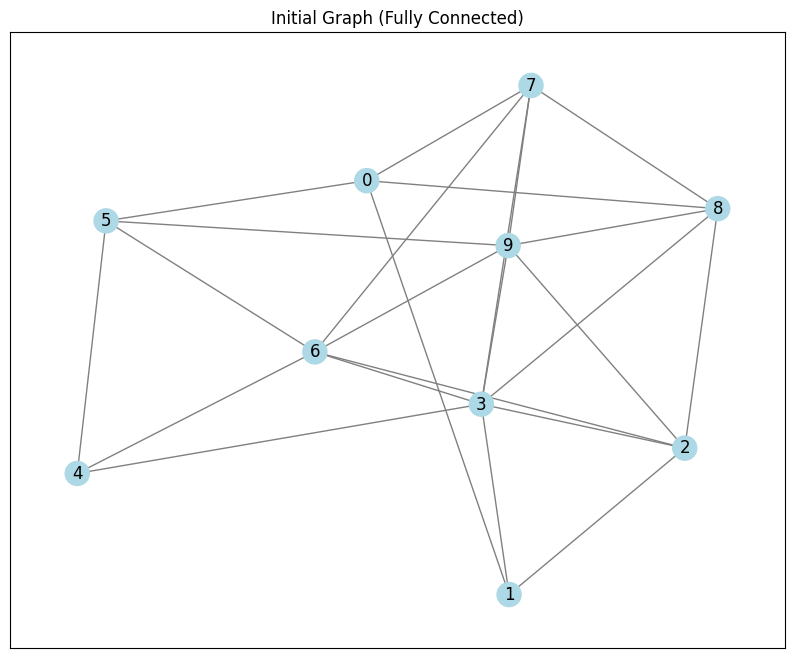


Generated Adjacency Matrix:
[0, 1, 0, 0, 0, 1, 0, 1, 1, 0]
[1, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 1, 0, 1, 1]
[0, 1, 1, 0, 1, 0, 1, 1, 1, 1]
[0, 0, 0, 1, 0, 1, 1, 0, 0, 0]
[1, 0, 0, 0, 1, 0, 1, 0, 0, 1]
[0, 0, 1, 1, 1, 1, 0, 1, 0, 1]
[1, 0, 0, 1, 0, 0, 1, 0, 1, 1]
[1, 0, 1, 1, 0, 0, 0, 1, 0, 1]
[0, 0, 1, 1, 0, 1, 1, 1, 1, 0]

Performing BFS...


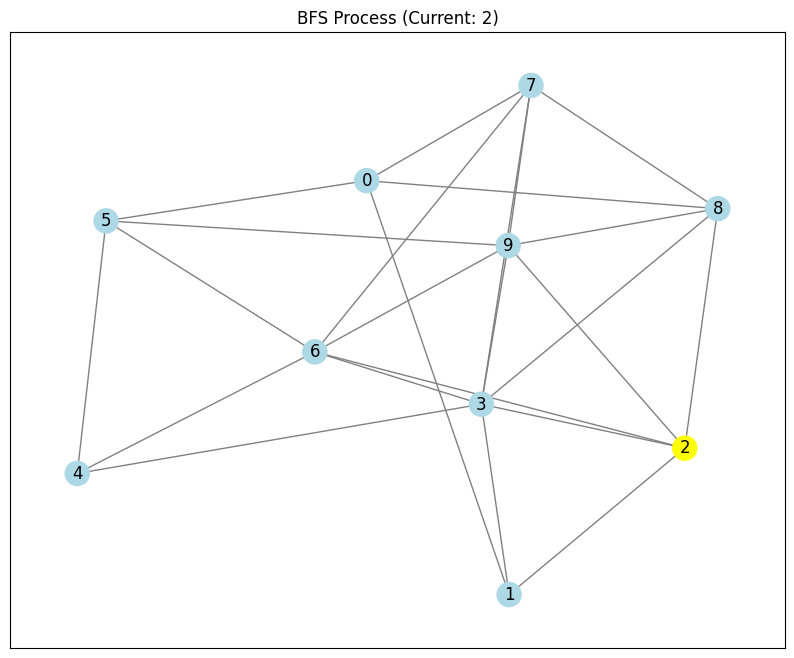

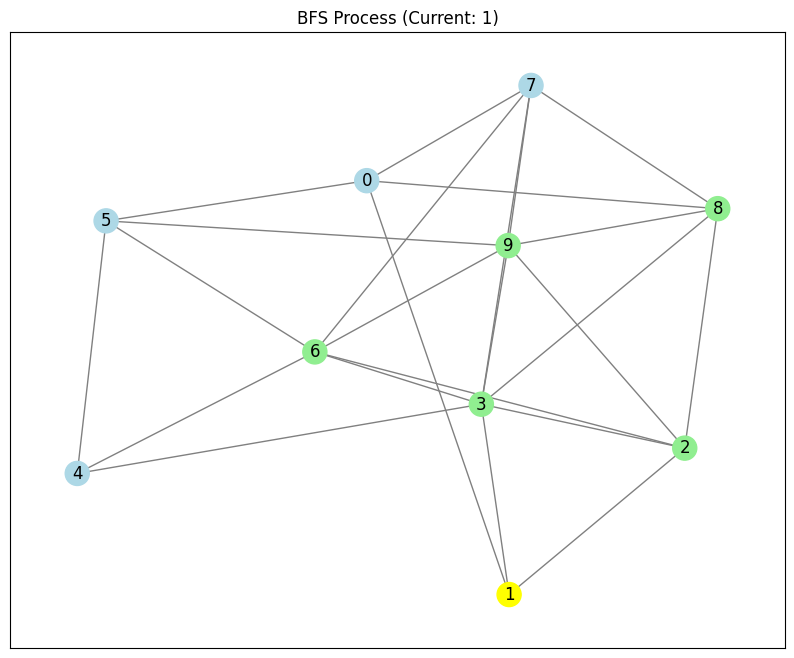

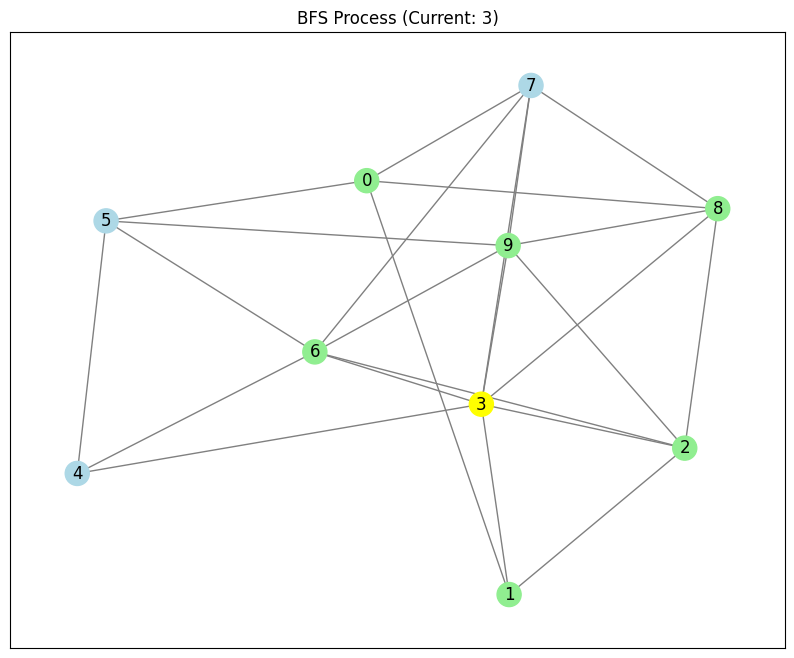

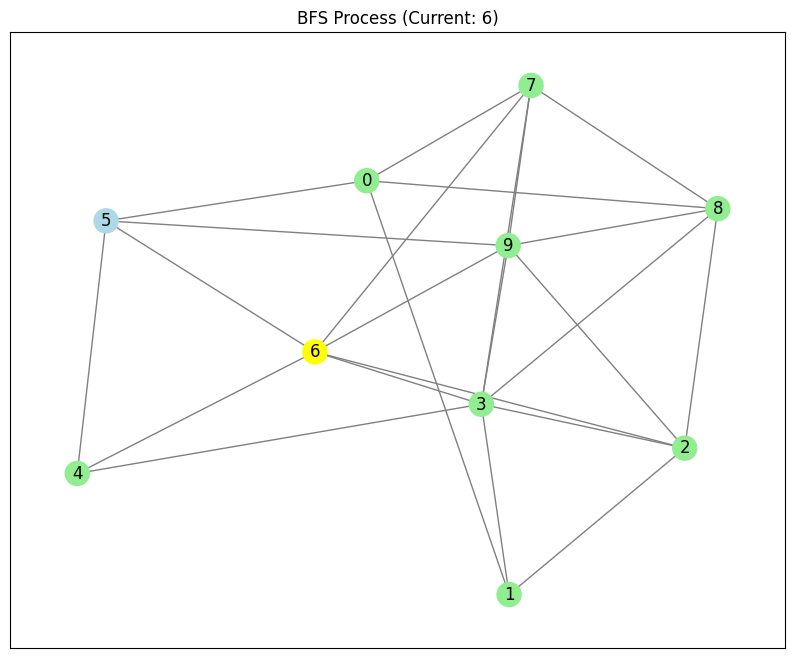

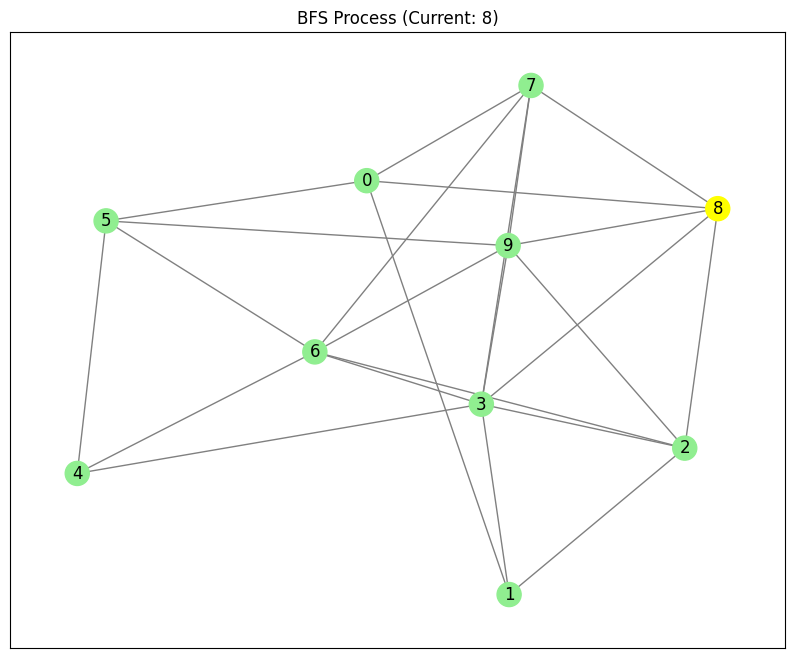

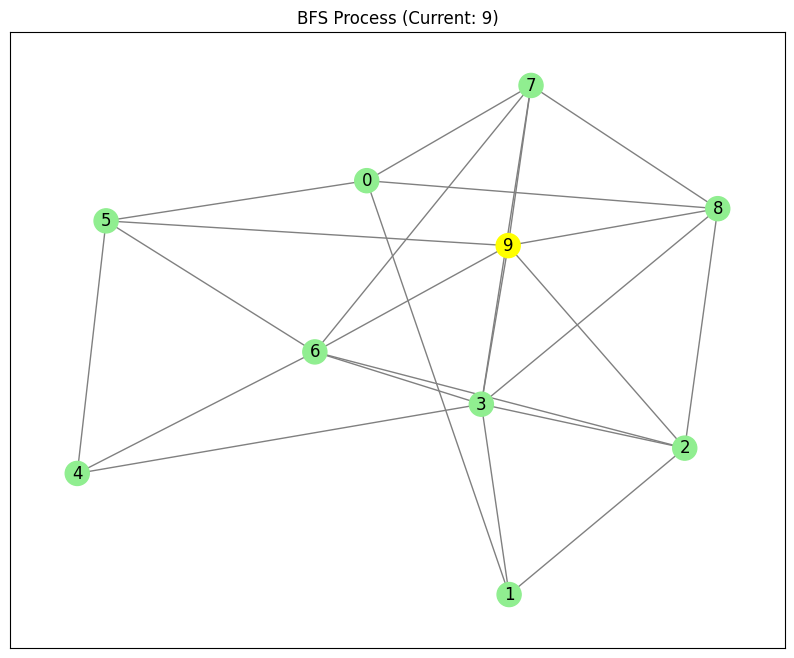

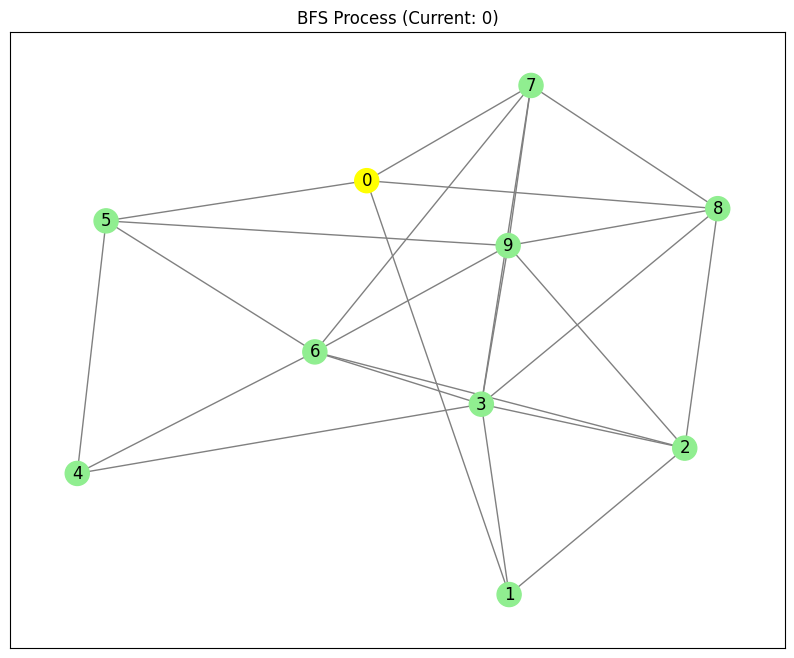

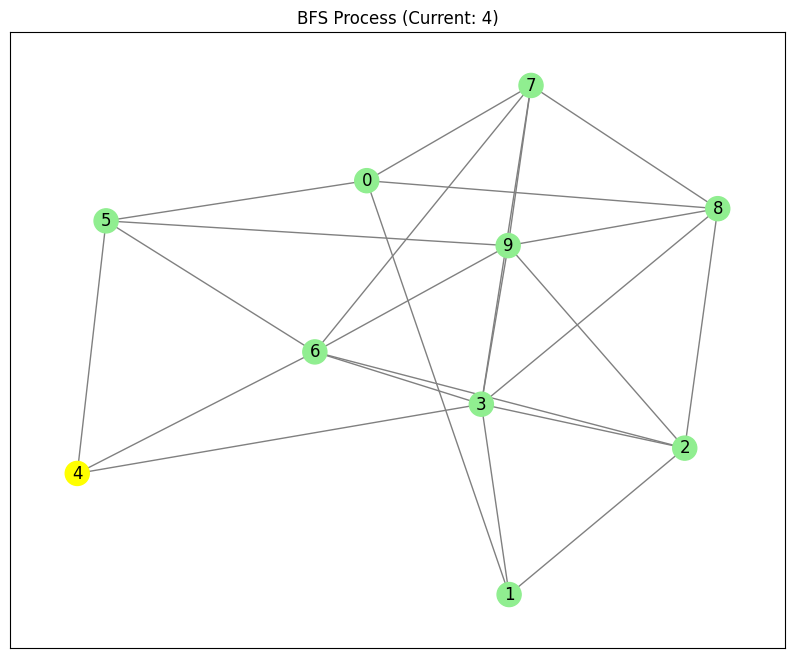

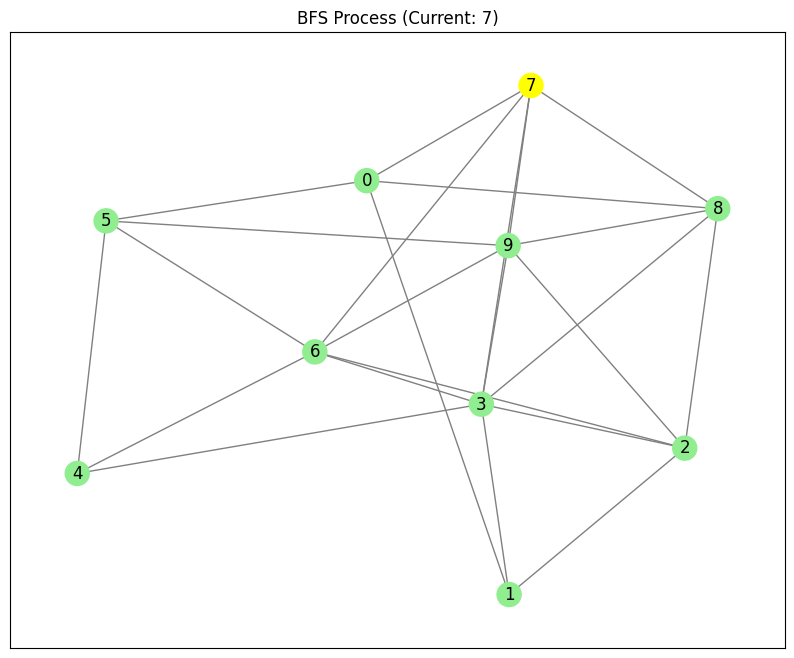

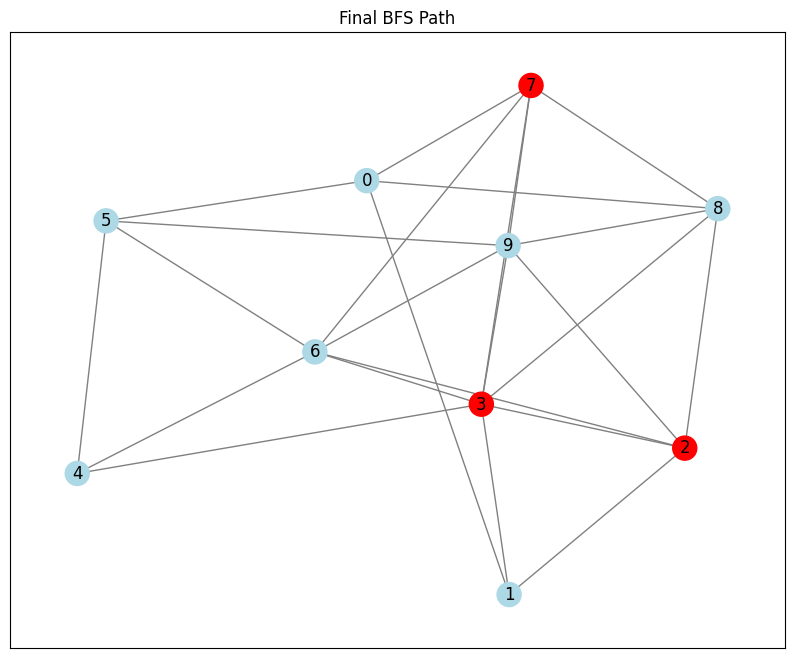

BFS Path: 2 -> 3 -> 7

Performing DFS...


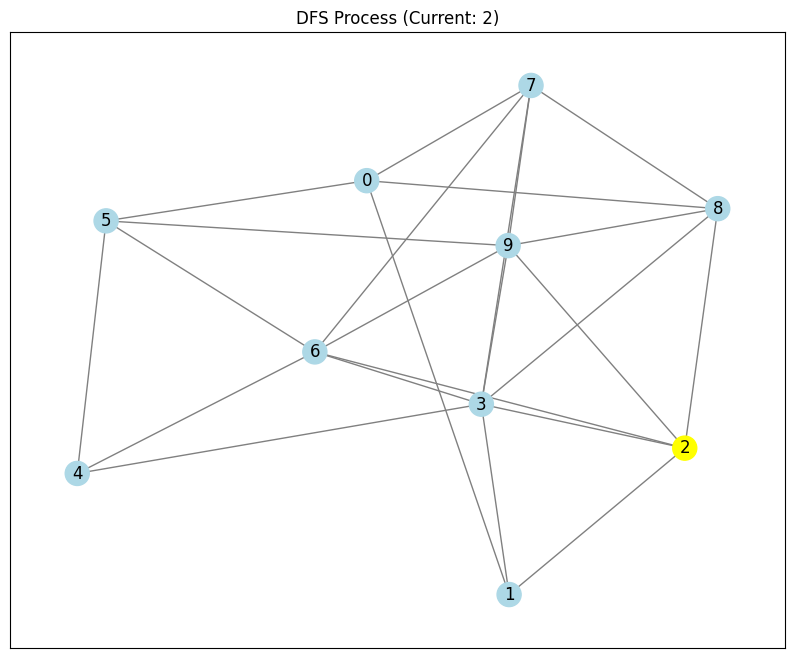

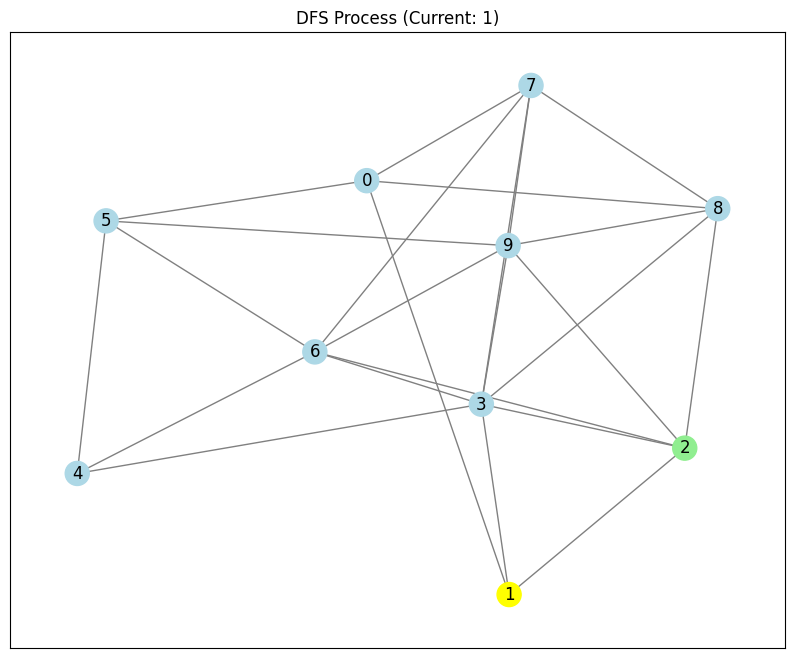

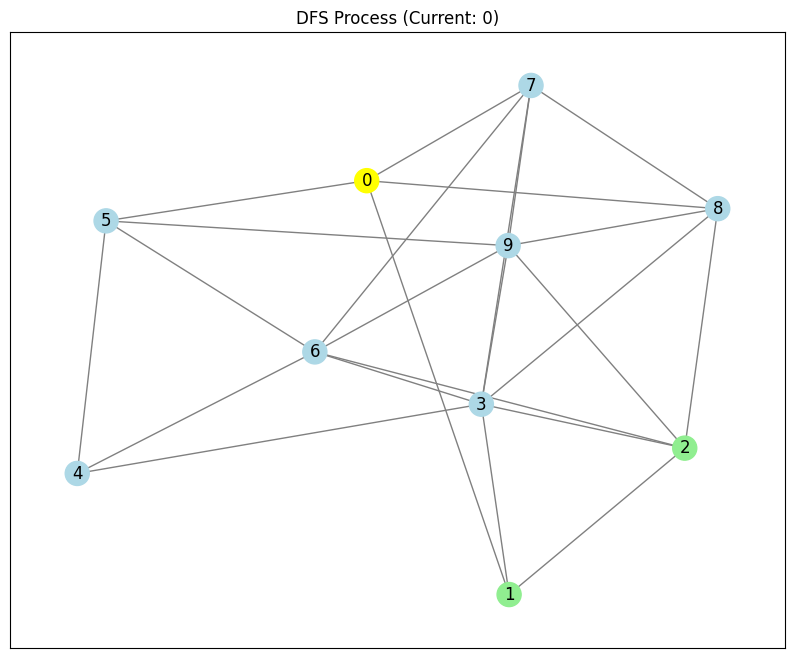

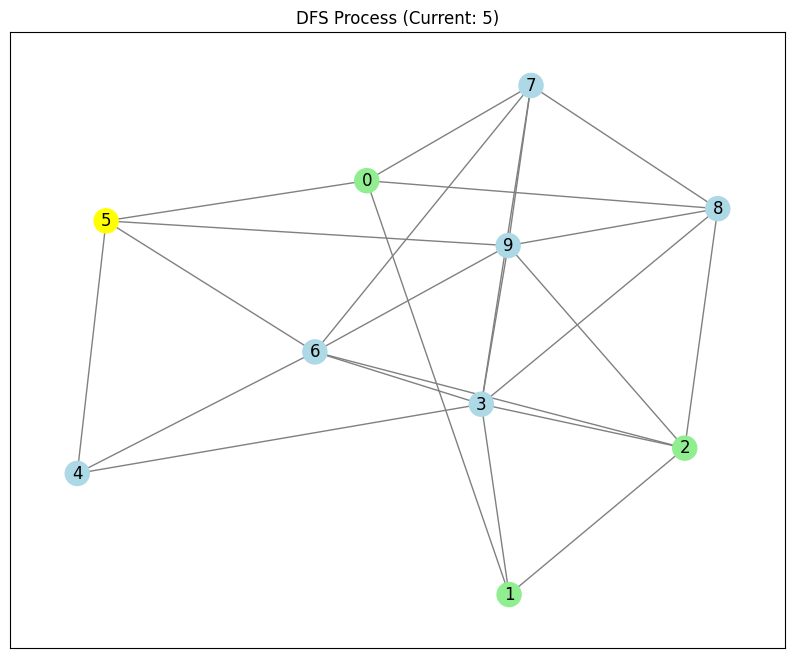

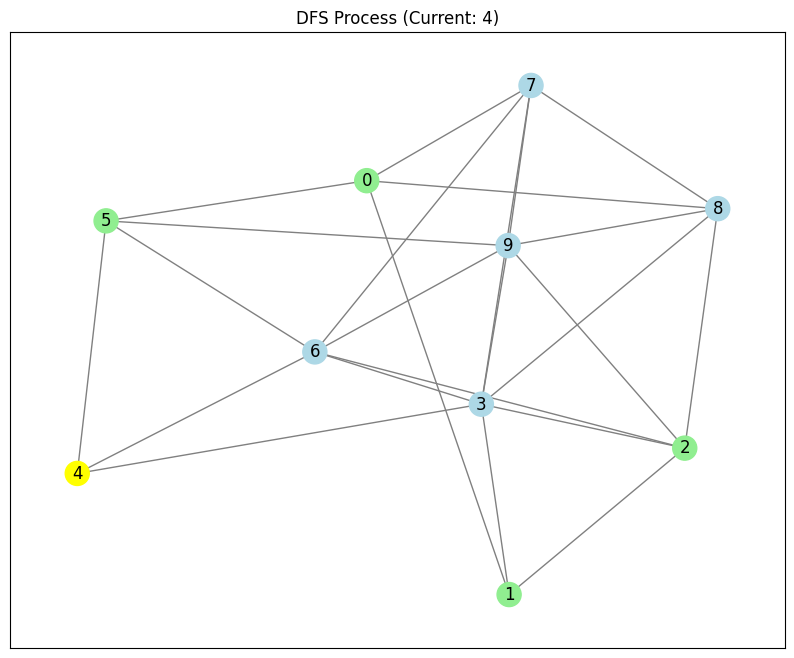

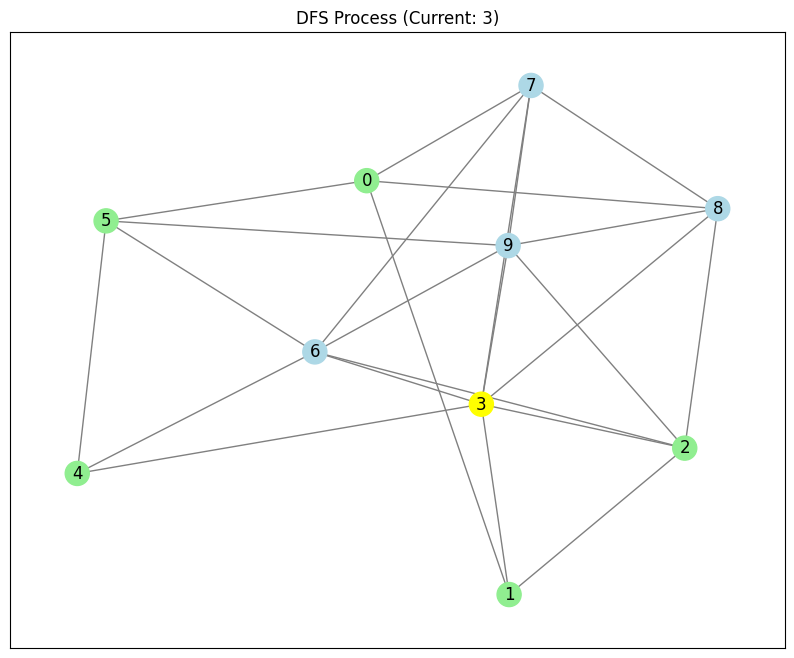

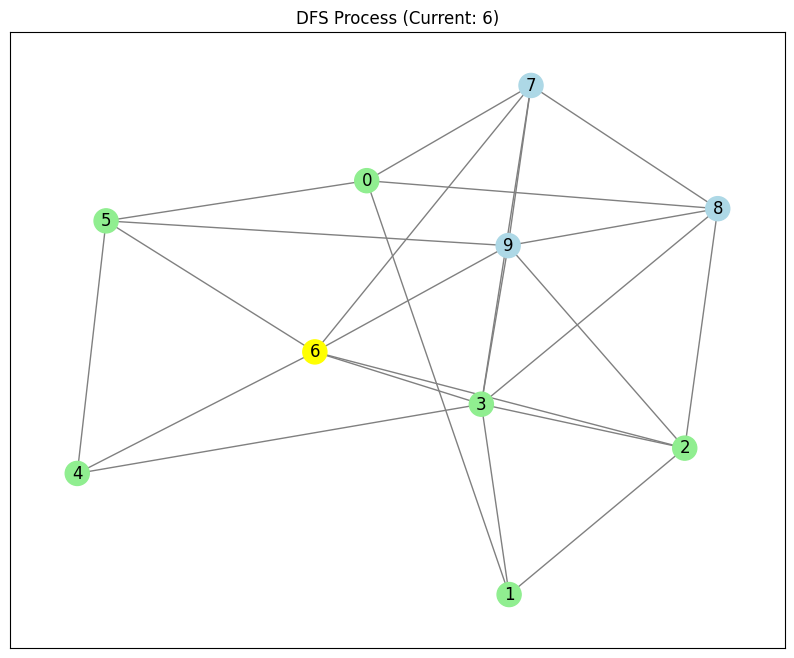

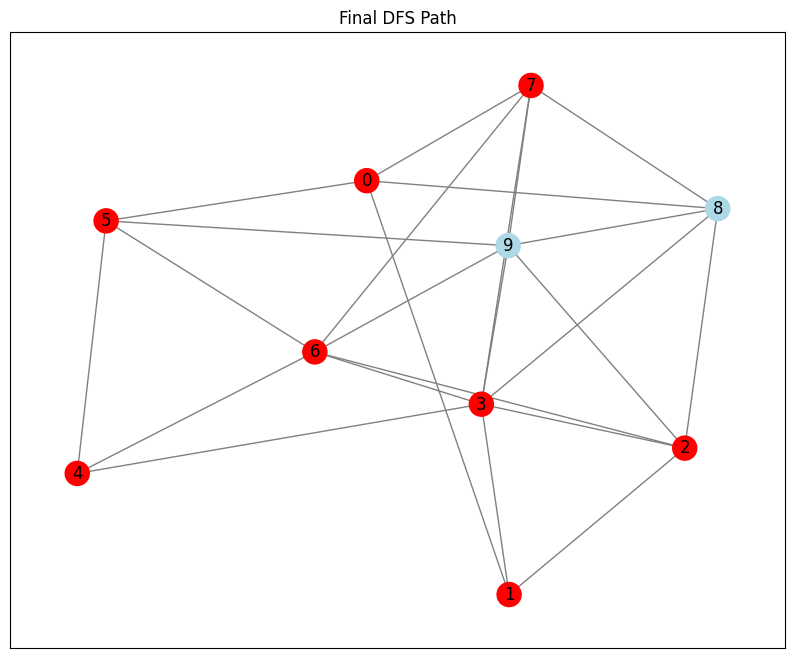

DFS Path: 2 -> 1 -> 0 -> 5 -> 4 -> 3 -> 6 -> 7


In [4]:
main()
